<a href="https://colab.research.google.com/github/alammobaDar/CCMACLRL_EXERCISES_COM231ML/blob/main/Copy_of_midtermexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Training Data

In [173]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


#### Display Data **infos**

In [146]:
traindata.describe()
traindata.info()

traindata.corr()['FloodProbability'].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

,FloodProbability
FloodProbability,1.000000
DeterioratingInfrastructure,0.190007
MonsoonIntensity,0.189098
DamsQuality,0.187996
TopographyDrainage,0.187635
RiverManagement,0.187131
Siltation,0.186789
PopulationScore,0.185890
Landslides,0.185346
ClimateChange,0.184761


#### Visualisation of Data

this shows that data from our independent variable does not correlates with or dependent variable(Flood Probability)

<Figure size 1200x1200 with 0 Axes>

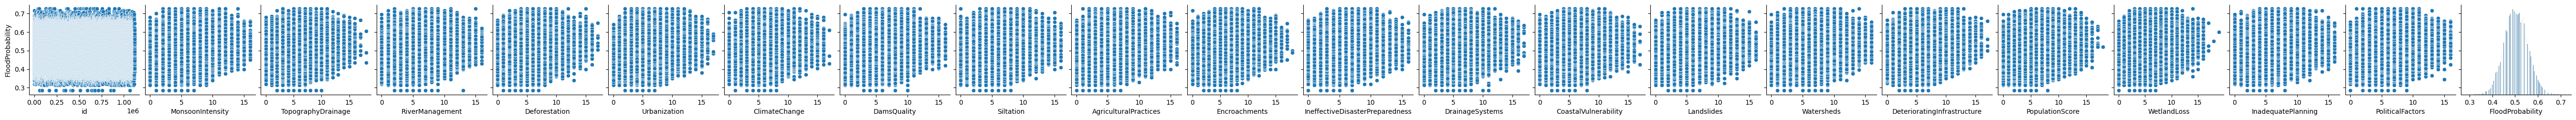

In [118]:
plt.figure(figsize=(12, 12))
sns.pairplot(traindata,y_vars="FloodProbability")


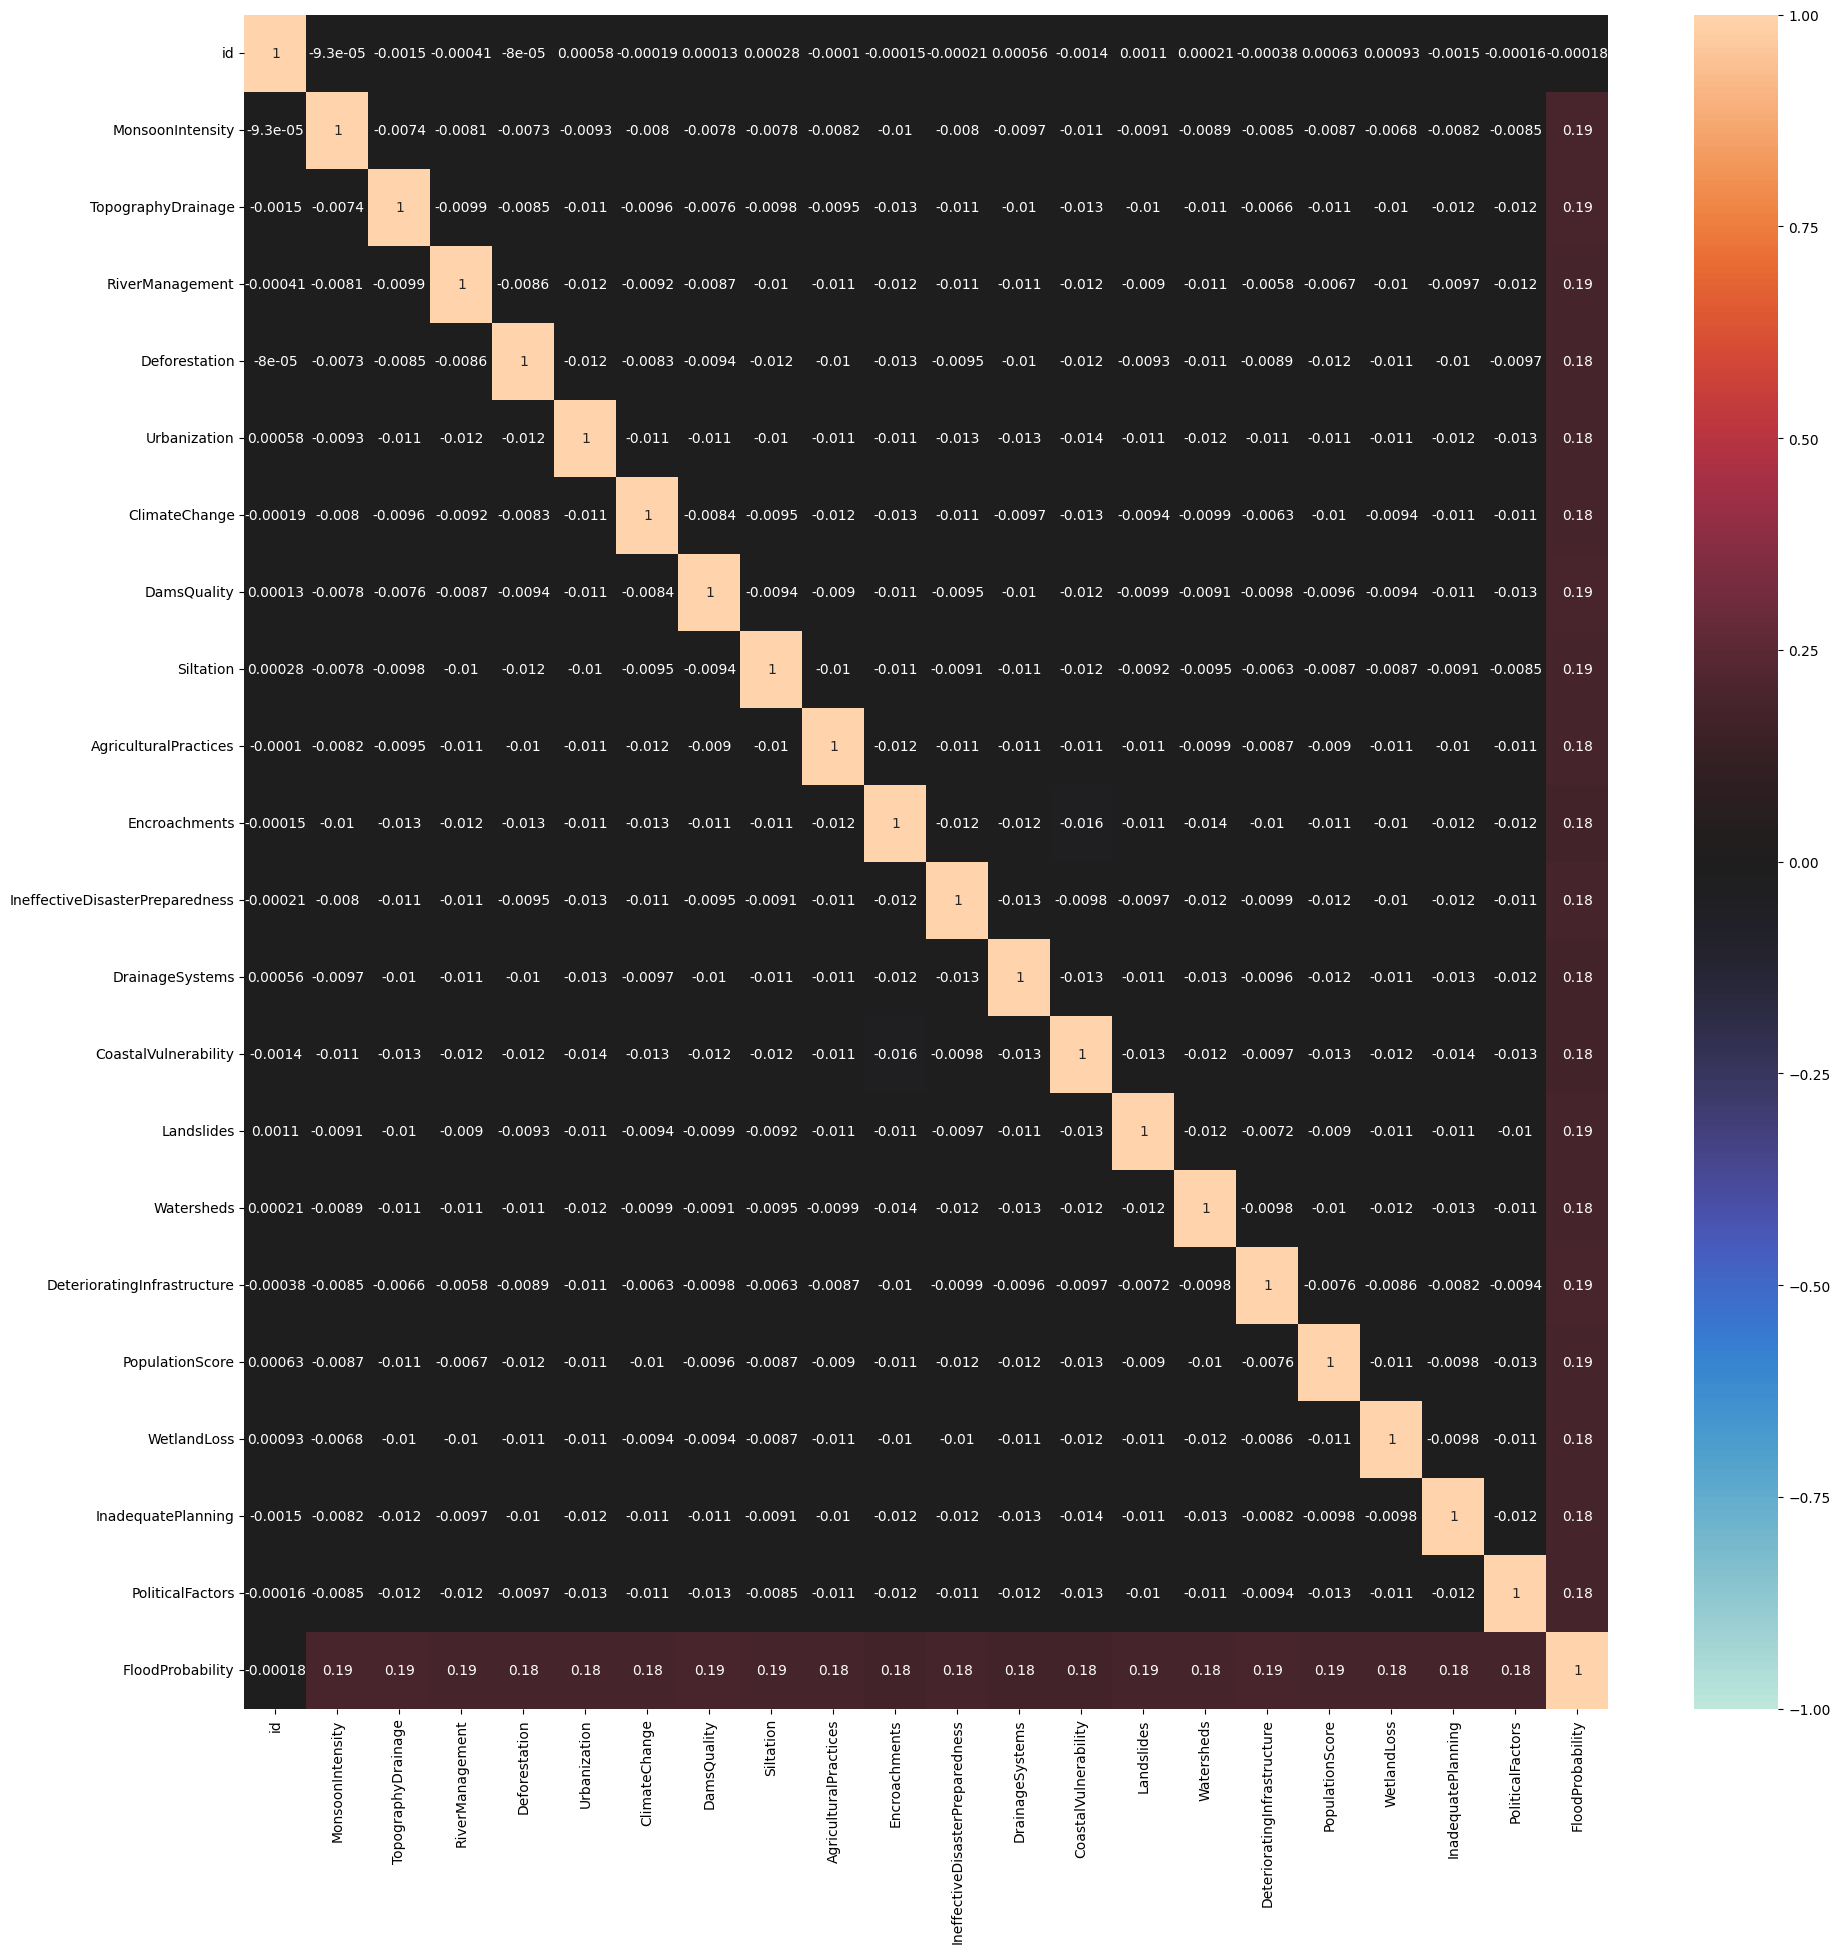

In [119]:
plt.figure(figsize=(22, 22))
sns.heatmap(traindata.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

#### Display p-values and Correlation Coefficient

In [175]:
y = traindata.pop("FloodProbability")
id = traindata.pop("id")
X = traindata

# Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.33, random_state=7)

potential_feature = {}
for col in X.columns:
  print("-------------------------------------")
  result = pearsonr(traindata[col], y)
  print(f"{col} and Flood Probability")
  print("correlation coefficient:", result[0])
  print("p-value:", result[1])

X = sm.add_constant(X)


-------------------------------------
MonsoonIntensity and Flood Probability
correlation coefficient: 0.18909829231500214
p-value: 0.0
-------------------------------------
TopographyDrainage and Flood Probability
correlation coefficient: 0.18763504566957656
p-value: 0.0
-------------------------------------
RiverManagement and Flood Probability
correlation coefficient: 0.1871306450726629
p-value: 0.0
-------------------------------------
Deforestation and Flood Probability
correlation coefficient: 0.1840009162515054
p-value: 0.0
-------------------------------------
Urbanization and Flood Probability
correlation coefficient: 0.18086050730243625
p-value: 0.0
-------------------------------------
ClimateChange and Flood Probability
correlation coefficient: 0.18476149035819184
p-value: 0.0
-------------------------------------
DamsQuality and Flood Probability
correlation coefficient: 0.1879961491439414
p-value: 0.0
-------------------------------------
Siltation and Flood Probability
co

In [176]:
traindata.head()
# traindata.pop("const")

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


#### Train Model

In [177]:


mlr_model = LinearRegression()
mlr_model.fit(X, y)
y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: -0.05329907893699115
Coefficients: [0.         0.00561159 0.00564756 0.00566643 0.00567915 0.00565772
 0.00566253 0.00565494 0.00563783 0.00563522 0.00564989 0.0056404
 0.00563556 0.00567088 0.00564163 0.0056465  0.00561563 0.0056775
 0.00563494 0.00560868 0.0056494 ]


In [178]:
X.head()
X.drop('const', axis=1)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,3,7,8,7,2,2,1,4,6,4
1117953,2,2,4,3,9,5,8,1,3,5,5,9,4,4,3,7,4,9,4,5
1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4
1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4


#### Display Residual Plot

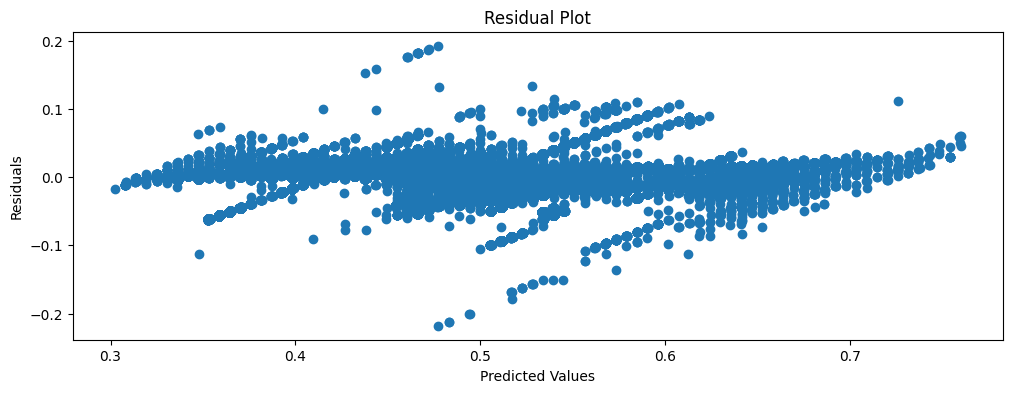

In [179]:
fig, axs = plt.subplots(1,1, figsize=(12, 4))

axs.scatter(y_pred, y_pred - y)
axs.set_title("Residual Plot")
axs.set_xlabel("Predicted Values")
axs.set_ylabel("Residuals")

plt.show()

In [180]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:41:38   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0533      0.000   -234.995      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   9.25e-06    606.734      0.000       0.006       0.006
TopographyDrainage                  0.0056   9.09e-06    621.525      0.000       0.006       0.006
RiverManagement                     0.0057   9.18e-06    617.178      0.000       0.006       0.006
Deforestation                       0.0057   9.27e-06    612.404      0.000       0.006       0.006
Urbanization                        0.0057   9.14e-06    619.319      0.000       0.006       0.006
ClimateChange                       0.0057   9.25e-06    612.437      0.000       0.006       0.006
DamsQuality                         0.0057   9.13e-06    619.170      0.000       0.006       0.006
Siltation                           0.0056   9.21e-06    612.284      0.000       0.006       0.006
AgriculturalPractices               0.0056    9.2e-06    612.643      0.000       0.006       0.006
Encroachments                       0.0056   9.14e-06    618.374      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   9.16e-06    615.995      0.000       0.006       0.006
DrainageSystems                     0.0056   9.18e-06    613.641      0.000       0.006       0.006
CoastalVulnerability                0.0057   9.11e-06    622.228      0.000       0.006       0.006
Landslides                          0.0056   9.15e-06    616.245      0.000       0.006       0.006
Watersheds                          0.0056   9.14e-06    617.853      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   9.21e-06    609.647      0.000       0.006       0.006
PopulationScore                     0.0057   9.17e-06    618.914      0.000       0.006       0.006
WetlandLoss                         0.0056    9.2e-06    612.654      0.000       0.006       0.006
InadequatePlanning                  0.0056   9.14e-06    613.363      0.000       0.006       0.006
PoliticalFactors                    0.0056    9.1e-06    620.512      0.000       0.006       0.006
==============================================================================
Omnibus:                   100155.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148528.907
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
print("model r_square")
olsmod.rsquared

model r_square


np.float64(0.8449501050792338)

### So throughout the analyzing of data:

*   The data shown that features are all completed, when i run .info and .describe, there is no null values found, that proves the data is cleaned.
*   When i called the correlation it shows that all of the features except 'id' have a positive correlation, although they are so low like (0.15, 0.18)
*   I used MultiLinear Regression to use all the feature except id on building the model.
*   The model shows a promising result as the r-squared shows (0.845)
*   I tried using train_split so i can try to shuffle the data but the result is not promising (0.843)



## Test File

In [155]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

## Sample Submission File

In [185]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'

samplefile = pd.read_csv(sample_submission_url)

testdata_for_prediction = testdata.copy() # Create a copy to avoid modifying the original testdata
testdata_for_prediction.pop('id')

# Add a 'const' column to testdata_for_prediction to match the training data
testdata_for_prediction = sm.add_constant(testdata_for_prediction, has_constant='add')

# Ensure the column order of testdata_for_prediction matches the training data (X)
testdata_for_prediction = testdata_for_prediction[X.columns]

y_pred = mlr_model.predict(testdata_for_prediction)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': testdata['id'],  # Use the original 'id' column from testdata for the submission file
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
